In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math

In [38]:
df = df = pd.read_excel("açoes_magalu.xlsx")
df

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723
...,...,...,...,...,...,...,...
242,2021-12-23,6.340000,5.990000,6.220000,6.200000,97106100,6.200000
243,2021-12-27,6.780000,6.230000,6.230000,6.780000,124279800,6.780000
244,2021-12-28,6.960000,6.640000,6.790000,6.830000,165573900,6.830000
245,2021-12-29,6.900000,6.700000,6.840000,6.760000,79247400,6.760000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


**Tranformando o datatime em string:**

In [40]:
from datetime import datetime

df['Data'] = (datetime.now().strftime('%d-%m-%Y'))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        247 non-null    object 
 1   Maior       247 non-null    float64
 2   Menor       247 non-null    float64
 3   Abertura    247 non-null    float64
 4   Fechamento  247 non-null    float64
 5   Volume      247 non-null    int64  
 6   Adj Close   247 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [44]:
X_train = df.iloc[:,4:5].values

In [46]:
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)

In [47]:
X_train_lista = []
y_train_lista = []
timestamp = 45
lenght = len(X_train)
for i in range(timestamp, lenght):
  X_train_lista.append(X_train_sc[i-timestamp:i,0])
  y_train_lista.append(X_train_sc[i,0])

X_train_lista = np.array(X_train_lista)
y_train_lista = np.array(y_train_lista)

In [48]:
print(X_train_lista[0])
print("\n")
print(y_train_lista[0])

[0.94926834 0.9278049  0.86439021 0.8497561  0.88292685 0.86585366
 0.90048785 0.89170735 0.87756096 0.88878045 0.91268298 0.89463415
 0.96000001 0.96341463 0.98780488 0.97609757 0.97804884 0.99756101
 0.95268296 0.93609759 0.95414632 0.9712195  0.95463413 0.98097564
 0.99609756 1.         0.95414632 0.9712195  0.98390244 0.96390245
 0.94146347 0.9365854  0.90292684 0.93268297 0.9219512  0.89317071
 0.89951222 0.91756095 0.90390247 0.94536591 0.96097565 0.94585363
 0.8468293  0.86097559 0.93463414]


0.9297560715093849


In [50]:
X_train_lista = np.reshape(X_train_lista, (X_train_lista.shape[0], X_train_lista.shape[1], 1))
X_train_lista.shape

(202, 45, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=120, return_sequences=True, input_shape = (X_train_lista.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=120, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train_lista, y_train_lista, epochs=100, batch_size=30, verbose=2)

In [55]:
test_set = df.loc[:,df.columns == "Fechamento"]

In [56]:
y_test = test_set.iloc[timestamp:,0:].values

In [57]:
closing_price = test_set.iloc[:,0:].values
closing_price_scaled = sc.transform(closing_price)

In [58]:
X_test = []
lenght = len(test_set)

for i in range(timestamp, lenght):
  X_test.append(closing_price_scaled[i-timestamp:i,0])

X_test = np.array(X_test)
X_test.shape

(202, 45)

In [59]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(202, 45, 1)

In [60]:
y_pred = model.predict(X_test)
predicted_price = sc.inverse_transform(y_pred)

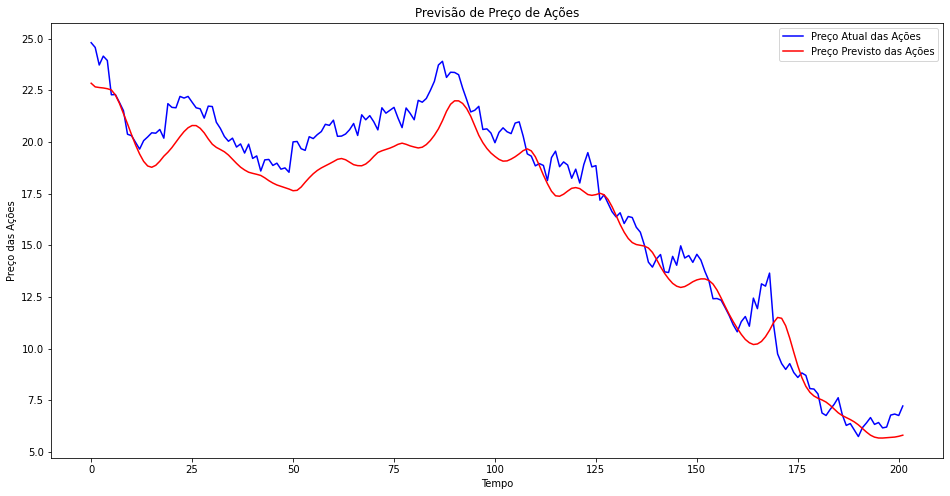

In [61]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color="blue", label="Preço Atual das Ações")
plt.plot(predicted_price, color="red", label="Preço Previsto das Ações")
plt.title("Previsão de Preço de Ações")
plt.xlabel("Tempo")
plt.ylabel("Preço das Ações")
plt.legend()